In [2]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
tqdm.pandas()
import nltk

from collections import Counter
import regex
import re

import logging


from flashtext import KeywordProcessor
kp = KeywordProcessor()

import tomotopy as tp
print(tp.isa)
import sys

import nltk.stem, nltk.corpus, nltk.tokenize, re
import matplotlib.pyplot as plt

sse2


### 데이터 불러오기

문서명과 텍스트데이터 열로 분리

In [110]:
df = pd.read_csv('./raw_data.csv')

df.head()

,document,text
0,Rye2019_550250.txt,\nManagement's Discussion and Analysis Decembe...
1,Rye2020_550250.txt,"\n\nAs management of the City of Rye, New York..."
2,Rye2018_550250.txt,"\n\nAs management of the City of Rye, New York..."
3,Rye2013_550250.txt,"Management's Discussion and Analysis (""MD&A"")\..."
4,Rye2015_550250.txt,"\n\n\nAs management of the City of Rye, New Yo..."


In [111]:
from nltk.tokenize import TreebankWordTokenizer

In [112]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brightcircle/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [113]:
class Preprocessing :
    """
    sumary
    """
    
    def __init__(self, df ) :
        self.df = df
        self.stopwords_list = stopwords.words('english') #불용어 리스트
        self.synonym_dict = {"n't" : ['not']} # 동의어 딕셔너리
    
    def only_eng(self, df) :
        list_par = []
        for i in df.index :
            for idx in df['token'][i] :

                text = re.sub('[^a-zA-Z]', '', idx).strip()
                text = text.lower()
                if(text!=''):
                    list_par.append(text)

        
        
    def tokenize(self) :
        tokenizer = TreebankWordTokenizer()
        self.df['token'] =0 
        
        for idx in tqdm(self.df.index) :
            self.df['token'][idx] = tokenizer.tokenize(self.df['text'][idx])
            
            list_par = []
            for i in self.df['token'][idx] :
                text = re.sub('[^a-zA-Z]', '', i).strip()
                text = text.lower()
                if(text!='' and len(text)>1): #2 글자 이상의 단어만 포함
                    list_par.append(text)


            self.df['token'][idx] = list_par
    
        print(df['token'])

    
    def elim_stopwords(self, words=[]):
        self.stopwords_list.extend(words)
        df['token'] = df['token'].map(lambda x:[w for w in x if not w in self.stopwords_list]) 
        
    def synonym(self) :
        kp.add_keywords_from_dict(self.synonym_dict)
        df['token'] = [[kp.replace_keywords(x) for x in w] for w in tqdm(df['token'])]

In [114]:
preprocess=Preprocessing(df)

In [115]:
preprocess.tokenize()

  0%|          | 0/268 [00:00<?, ?it/s]

/var/folders/q9/1ydypryj47n2g37569rqj0p80000gn/T/ipykernel_19443/1153376837.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['token'][idx] = tokenizer.tokenize(self.df['text'][idx])


0      [management, discussion, and, analysis, decemb...
1      [as, management, of, the, city, of, rye, new, ...
2      [as, management, of, the, city, of, rye, new, ...
3      [management, discussion, and, analysis, md, as...
4      [as, management, of, the, city, of, rye, new, ...
                             ...                        
263    [as, management, of, the, city, of, saratoga, ...
264    [management, discussion, and, analysis, decemb...
265    [as, management, of, the, city, of, saratoga, ...
266    [as, management, of, the, city, of, saratoga, ...
267    [as, management, of, the, city, of, saratoga, ...
Name: token, Length: 268, dtype: object


In [116]:
place_name= [
    'niagara', 'senecas', 'seneca', 'oneonta', 'depauw', 'saratoga', 'dunkirk', 'wastewater', 'buffalo', 'amsterdam', ' schenectady', 'newburgh', 'broadway', 'hudson', 'binghamton', 'broome', 'syracuse', 'canadaigua', 'tonawanda', 'ogdensburg', 'glens', 'falls', 'rochester', 'albany', 'ithaca', 'auburn', 'eastman', 'rochelle', 'yonkers'
]
preprocess.elim_stopwords(place_name)

In [117]:
preprocess.synonym()

  0%|          | 0/268 [00:00<?, ?it/s]

In [118]:
df

,document,text,token
0,Rye2019_550250.txt,\nManagement's Discussion and Analysis Decembe...,"[management, discussion, analysis, december, m..."
1,Rye2020_550250.txt,"\n\nAs management of the City of Rye, New York...","[management, city, rye, new, york, city, offer..."
2,Rye2018_550250.txt,"\n\nAs management of the City of Rye, New York...","[management, city, rye, new, york, city, offer..."
3,Rye2013_550250.txt,"Management's Discussion and Analysis (""MD&A"")\...","[management, discussion, analysis, md, managem..."
4,Rye2015_550250.txt,"\n\n\nAs management of the City of Rye, New Yo...","[management, city, rye, new, york, city, offer..."
...,...,...,...
263,SaratogaSprings2018_410252.txt,\n\nAs management of the City of Saratoga Spri...,"[management, city, springs, new, york, city, o..."
264,SaratogaSprings2017_410252.txt,\nManagement's Discussion and Analysis Decembe...,"[management, discussion, analysis, december, m..."
265,SaratogaSprings2019_410252.txt,\n\nAs management of the City of Saratoga Spri...,"[management, city, springs, new, york, city, o..."
266,SaratogaSprings2015_410252.txt,\n\nAs management of the City of Saratoga Spri...,"[management, city, springs, new, york, city, o..."


In [119]:
# document에서 .txt 지우기

for i in df.index :
    df['document'][i] =df['document'][i][:-4]

df

,document,text,token
0,Rye2019_550250,\nManagement's Discussion and Analysis Decembe...,"[management, discussion, analysis, december, m..."
1,Rye2020_550250,"\n\nAs management of the City of Rye, New York...","[management, city, rye, new, york, city, offer..."
2,Rye2018_550250,"\n\nAs management of the City of Rye, New York...","[management, city, rye, new, york, city, offer..."
3,Rye2013_550250,"Management's Discussion and Analysis (""MD&A"")\...","[management, discussion, analysis, md, managem..."
4,Rye2015_550250,"\n\n\nAs management of the City of Rye, New Yo...","[management, city, rye, new, york, city, offer..."
...,...,...,...
263,SaratogaSprings2018_410252,\n\nAs management of the City of Saratoga Spri...,"[management, city, springs, new, york, city, o..."
264,SaratogaSprings2017_410252,\nManagement's Discussion and Analysis Decembe...,"[management, discussion, analysis, december, m..."
265,SaratogaSprings2019_410252,\n\nAs management of the City of Saratoga Spri...,"[management, city, springs, new, york, city, o..."
266,SaratogaSprings2015_410252,\n\nAs management of the City of Saratoga Spri...,"[management, city, springs, new, york, city, o..."


In [120]:
df.to_pickle('./preprocessed_ver4.pickle')

In [3]:
df= pd.read_pickle('./preprocessed_ver4.pickle')
df

,document,text,token
0,Rye2019_550250,\nManagement's Discussion and Analysis Decembe...,"[management, discussion, analysis, december, m..."
1,Rye2020_550250,"\n\nAs management of the City of Rye, New York...","[management, city, rye, new, york, city, offer..."
2,Rye2018_550250,"\n\nAs management of the City of Rye, New York...","[management, city, rye, new, york, city, offer..."
3,Rye2013_550250,"Management's Discussion and Analysis (""MD&A"")\...","[management, discussion, analysis, md, managem..."
4,Rye2015_550250,"\n\n\nAs management of the City of Rye, New Yo...","[management, city, rye, new, york, city, offer..."
...,...,...,...
263,SaratogaSprings2018_410252,\n\nAs management of the City of Saratoga Spri...,"[management, city, springs, new, york, city, o..."
264,SaratogaSprings2017_410252,\nManagement's Discussion and Analysis Decembe...,"[management, discussion, analysis, december, m..."
265,SaratogaSprings2019_410252,\n\nAs management of the City of Saratoga Spri...,"[management, city, springs, new, york, city, o..."
266,SaratogaSprings2015_410252,\n\nAs management of the City of Saratoga Spri...,"[management, city, springs, new, york, city, o..."


### Doc2Vec

In [5]:
from gensim.models import Doc2Vec
#from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [123]:
df

,document,text,token
0,Rye2019_550250,\nManagement's Discussion and Analysis Decembe...,"[management, discussion, analysis, december, m..."
1,Rye2020_550250,"\n\nAs management of the City of Rye, New York...","[management, city, rye, new, york, city, offer..."
2,Rye2018_550250,"\n\nAs management of the City of Rye, New York...","[management, city, rye, new, york, city, offer..."
3,Rye2013_550250,"Management's Discussion and Analysis (""MD&A"")\...","[management, discussion, analysis, md, managem..."
4,Rye2015_550250,"\n\n\nAs management of the City of Rye, New Yo...","[management, city, rye, new, york, city, offer..."
...,...,...,...
263,SaratogaSprings2018_410252,\n\nAs management of the City of Saratoga Spri...,"[management, city, springs, new, york, city, o..."
264,SaratogaSprings2017_410252,\nManagement's Discussion and Analysis Decembe...,"[management, discussion, analysis, december, m..."
265,SaratogaSprings2019_410252,\n\nAs management of the City of Saratoga Spri...,"[management, city, springs, new, york, city, o..."
266,SaratogaSprings2015_410252,\n\nAs management of the City of Saratoga Spri...,"[management, city, springs, new, york, city, o..."


In [124]:
text_and_tags = [(text, [df['document'][i],]) for i, text in enumerate(df['token'])]

#print("##"*20)
#print("tags and its texts")
#print("##"*20)
#for text, tags in text_and_tags:
    #print(f"tags: {tags}, text: {text}")


In [125]:
Train_documents = [TaggedDocument(words=text, tags=tag) for text, tag in text_and_tags]
print("##"*20)
print("Accessing Document vector")
print("##"*20)

########################################
Accessing Document vector
########################################


In [126]:
model = Doc2Vec(Train_documents, dm=1, vector_size=100)

In [127]:
model.save('./NY_doc2vec.model')

In [6]:
model = Doc2Vec.load('./NY_doc2vec.model')

In [7]:
#Most similar 로 test
print(model.docvecs.most_similar(positive=[model.infer_vector(df['token'][10])],topn=5))

[('Troy2020_380257', 0.8886864185333252), ('Troy2019_380257', 0.885757327079773), ('Troy2018_380257', 0.8705348968505859), ('Rochester2014_260248', 0.6814686059951782), ('Middletown2014_330230', 0.6705994606018066)]


/var/folders/q9/1ydypryj47n2g37569rqj0p80000gn/T/ipykernel_54377/3980702289.py:2: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  print(model.docvecs.most_similar(positive=[model.infer_vector(df['token'][10])],topn=5))


In [130]:
df

,document,text,token
0,Rye2019_550250,\nManagement's Discussion and Analysis Decembe...,"[management, discussion, analysis, december, m..."
1,Rye2020_550250,"\n\nAs management of the City of Rye, New York...","[management, city, rye, new, york, city, offer..."
2,Rye2018_550250,"\n\nAs management of the City of Rye, New York...","[management, city, rye, new, york, city, offer..."
3,Rye2013_550250,"Management's Discussion and Analysis (""MD&A"")\...","[management, discussion, analysis, md, managem..."
4,Rye2015_550250,"\n\n\nAs management of the City of Rye, New Yo...","[management, city, rye, new, york, city, offer..."
...,...,...,...
263,SaratogaSprings2018_410252,\n\nAs management of the City of Saratoga Spri...,"[management, city, springs, new, york, city, o..."
264,SaratogaSprings2017_410252,\nManagement's Discussion and Analysis Decembe...,"[management, discussion, analysis, december, m..."
265,SaratogaSprings2019_410252,\n\nAs management of the City of Saratoga Spri...,"[management, city, springs, new, york, city, o..."
266,SaratogaSprings2015_410252,\n\nAs management of the City of Saratoga Spri...,"[management, city, springs, new, york, city, o..."


In [8]:
df=df.sort_values(by=['document'])
df = df.reset_index(drop=True)
df

,document,text,token
0,Albany2014_010210,\nManagement Discussion & Analysis \n OVERV...,"[management, discussion, analysis, overview, m..."
1,Albany2015_010210,Management Discussion & Analysis\nOVERVIEW\n\n...,"[management, discussion, analysis, overview, m..."
2,Albany2016_010210,Management Discussion & Analysis \n OVERVIEW ...,"[management, discussion, analysis, overview, m..."
3,Albany2018_010210,\nManagement Discussion & Analysis \n OVERVIE...,"[management, discussion, analysis, overview, m..."
4,Albany2019_010210,Management Discussion & Analysis\nOVERVIEW\n\n...,"[management, discussion, analysis, overview, m..."
...,...,...,...
263,Yonkers2016_550262,"City of Yonkers, New York\n\nManagement's Dis...","[city, new, york, management, discussion, anal..."
264,Yonkers2017_550262,"\nCity of Yonkers, New York\n\nManagement's Di...","[city, new, york, management, discussion, anal..."
265,Yonkers2018_550262,"City of Yonkers, New York\n\nManagement's Dis...","[city, new, york, management, discussion, anal..."
266,Yonkers2019_550262,"City of Yonkers, New York\n\nManagement's Disc...","[city, new, york, management, discussion, anal..."


#### 각 문서별 타 문서와의 문서 유사도 구하기

In [10]:
doc_list = df['document'].to_list()
doc_list

['Albany2014_010210',
 'Albany2015_010210',
 'Albany2016_010210',
 'Albany2018_010210',
 'Albany2019_010210',
 'Amsterdam2016_270202',
 'Amsterdam2017_270202',
 'Amsterdam2018_270202',
 'Amsterdam2019_270202',
 'Amsterdam2020_270202',
 'Auburn2013_050203',
 'Auburn2014_050203',
 'Auburn2015_050203',
 'Auburn2016_050203',
 'Auburn2017_050203',
 'Auburn2018_050203',
 'Auburn2019_050203',
 'Auburn2020_050203',
 'Batavia2013_180204',
 'Batavia2014_180204',
 'Batavia2015_180204',
 'Batavia2016_180204',
 'Batavia2017_180204',
 'Batavia2018_180204',
 'Batavia2019_180204',
 'Batavia2020_180204',
 'Beacon2016_130205',
 'Beacon2017_130205',
 'Beacon2018_130205',
 'Beacon2019_130205',
 'Binghamton2013_030206',
 'Binghamton2014_030206',
 'Binghamton2015_030206',
 'Binghamton2016_030206',
 'Binghamton2017_030206',
 'Binghamton2018_030206',
 'Buffalo2013_140207',
 'Buffalo2014_140207',
 'Buffalo2015_140207',
 'Buffalo2016_140207',
 'Buffalo2018_140207',
 'Buffalo2019_140207',
 'Buffalo2020_140207',


In [11]:
df_sim = pd.DataFrame(index=doc_list, columns=doc_list)
df_sim

,Albany2014_010210,Albany2015_010210,Albany2016_010210,Albany2018_010210,Albany2019_010210,Amsterdam2016_270202,Amsterdam2017_270202,Amsterdam2018_270202,Amsterdam2019_270202,Amsterdam2020_270202,...,WhitePlains2019_550261,WhitePlains2020_550261,Yonkers2013_550262,Yonkers2014_550262,Yonkers2015_550262,Yonkers2016_550262,Yonkers2017_550262,Yonkers2018_550262,Yonkers2019_550262,Yonkers2020_550262
Albany2014_010210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albany2015_010210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albany2016_010210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albany2018_010210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albany2019_010210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yonkers2016_550262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yonkers2017_550262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yonkers2018_550262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yonkers2019_550262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
for doc in df_sim.index :
    for col in df_sim.columns :
        df_sim[doc][col] = model.docvecs.similarity(doc, col)

/var/folders/q9/1ydypryj47n2g37569rqj0p80000gn/T/ipykernel_54377/3477007557.py:3: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  df_sim[doc][col] = model.docvecs.similarity(doc, col)


In [13]:
df_sim

,Albany2014_010210,Albany2015_010210,Albany2016_010210,Albany2018_010210,Albany2019_010210,Amsterdam2016_270202,Amsterdam2017_270202,Amsterdam2018_270202,Amsterdam2019_270202,Amsterdam2020_270202,...,WhitePlains2019_550261,WhitePlains2020_550261,Yonkers2013_550262,Yonkers2014_550262,Yonkers2015_550262,Yonkers2016_550262,Yonkers2017_550262,Yonkers2018_550262,Yonkers2019_550262,Yonkers2020_550262
Albany2014_010210,1.0,0.921414,0.90784,0.90035,0.888746,0.297175,0.311682,0.275622,0.217511,0.219641,...,0.418828,0.457893,0.529647,0.504205,0.554801,0.55851,0.5539,0.590713,0.568643,0.596396
Albany2015_010210,0.921414,1.0,0.921836,0.932207,0.926831,0.31035,0.307213,0.301342,0.22657,0.21369,...,0.500392,0.531815,0.624952,0.588866,0.650263,0.660905,0.653132,0.659173,0.641104,0.657767
Albany2016_010210,0.90784,0.921836,1.0,0.895263,0.889413,0.289992,0.31009,0.261267,0.217576,0.232574,...,0.369654,0.410774,0.485411,0.442049,0.498549,0.523798,0.479577,0.488046,0.510475,0.534796
Albany2018_010210,0.90035,0.932207,0.895263,1.0,0.955469,0.323626,0.368908,0.319612,0.249545,0.251856,...,0.508812,0.550877,0.626276,0.571141,0.608186,0.618656,0.615749,0.652854,0.582231,0.645874
Albany2019_010210,0.888746,0.926831,0.889413,0.955469,1.0,0.338662,0.371426,0.33014,0.233615,0.236523,...,0.447467,0.481931,0.56611,0.533119,0.56763,0.600559,0.567879,0.618811,0.562274,0.602516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yonkers2016_550262,0.55851,0.660905,0.523798,0.618656,0.600559,0.344512,0.254295,0.290176,0.202786,0.193933,...,0.637833,0.664731,0.855758,0.860531,0.917486,1.0,0.908755,0.870005,0.891995,0.863475
Yonkers2017_550262,0.5539,0.653132,0.479577,0.615749,0.567879,0.298298,0.259187,0.329496,0.234695,0.199654,...,0.690431,0.694048,0.902142,0.898789,0.904978,0.908755,1.0,0.924809,0.9155,0.915607
Yonkers2018_550262,0.590713,0.659173,0.488046,0.652854,0.618811,0.278742,0.253051,0.317478,0.183473,0.128633,...,0.688537,0.707217,0.909731,0.900156,0.899448,0.870005,0.924809,1.0,0.903011,0.896904
Yonkers2019_550262,0.568643,0.641104,0.510475,0.582231,0.562274,0.263475,0.240502,0.269894,0.159448,0.149674,...,0.612982,0.630745,0.841049,0.843519,0.861558,0.891995,0.9155,0.903011,1.0,0.941324


In [14]:
df_sim = df_sim.reindex(columns = ['city', 'year', 'ID'] + df_sim.columns.to_list())
df_sim

,city,year,ID,Albany2014_010210,Albany2015_010210,Albany2016_010210,Albany2018_010210,Albany2019_010210,Amsterdam2016_270202,Amsterdam2017_270202,...,WhitePlains2019_550261,WhitePlains2020_550261,Yonkers2013_550262,Yonkers2014_550262,Yonkers2015_550262,Yonkers2016_550262,Yonkers2017_550262,Yonkers2018_550262,Yonkers2019_550262,Yonkers2020_550262
Albany2014_010210,NaN,NaN,NaN,1.0,0.921414,0.90784,0.90035,0.888746,0.297175,0.311682,...,0.418828,0.457893,0.529647,0.504205,0.554801,0.55851,0.5539,0.590713,0.568643,0.596396
Albany2015_010210,NaN,NaN,NaN,0.921414,1.0,0.921836,0.932207,0.926831,0.31035,0.307213,...,0.500392,0.531815,0.624952,0.588866,0.650263,0.660905,0.653132,0.659173,0.641104,0.657767
Albany2016_010210,NaN,NaN,NaN,0.90784,0.921836,1.0,0.895263,0.889413,0.289992,0.31009,...,0.369654,0.410774,0.485411,0.442049,0.498549,0.523798,0.479577,0.488046,0.510475,0.534796
Albany2018_010210,NaN,NaN,NaN,0.90035,0.932207,0.895263,1.0,0.955469,0.323626,0.368908,...,0.508812,0.550877,0.626276,0.571141,0.608186,0.618656,0.615749,0.652854,0.582231,0.645874
Albany2019_010210,NaN,NaN,NaN,0.888746,0.926831,0.889413,0.955469,1.0,0.338662,0.371426,...,0.447467,0.481931,0.56611,0.533119,0.56763,0.600559,0.567879,0.618811,0.562274,0.602516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yonkers2016_550262,NaN,NaN,NaN,0.55851,0.660905,0.523798,0.618656,0.600559,0.344512,0.254295,...,0.637833,0.664731,0.855758,0.860531,0.917486,1.0,0.908755,0.870005,0.891995,0.863475
Yonkers2017_550262,NaN,NaN,NaN,0.5539,0.653132,0.479577,0.615749,0.567879,0.298298,0.259187,...,0.690431,0.694048,0.902142,0.898789,0.904978,0.908755,1.0,0.924809,0.9155,0.915607
Yonkers2018_550262,NaN,NaN,NaN,0.590713,0.659173,0.488046,0.652854,0.618811,0.278742,0.253051,...,0.688537,0.707217,0.909731,0.900156,0.899448,0.870005,0.924809,1.0,0.903011,0.896904
Yonkers2019_550262,NaN,NaN,NaN,0.568643,0.641104,0.510475,0.582231,0.562274,0.263475,0.240502,...,0.612982,0.630745,0.841049,0.843519,0.861558,0.891995,0.9155,0.903011,1.0,0.941324


In [15]:
for doc in df_sim.index:
    df_sim['ID'][doc] = doc[-6:]
    df_sim['year'][doc] = int(doc[-11:-7])
    df_sim['city'][doc] = doc[:-11]
    
df_sim

/var/folders/q9/1ydypryj47n2g37569rqj0p80000gn/T/ipykernel_54377/272023072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sim['ID'][doc] = doc[-6:]
/var/folders/q9/1ydypryj47n2g37569rqj0p80000gn/T/ipykernel_54377/272023072.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sim['year'][doc] = int(doc[-11:-7])
/var/folders/q9/1ydypryj47n2g37569rqj0p80000gn/T/ipykernel_54377/272023072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

,city,year,ID,Albany2014_010210,Albany2015_010210,Albany2016_010210,Albany2018_010210,Albany2019_010210,Amsterdam2016_270202,Amsterdam2017_270202,...,WhitePlains2019_550261,WhitePlains2020_550261,Yonkers2013_550262,Yonkers2014_550262,Yonkers2015_550262,Yonkers2016_550262,Yonkers2017_550262,Yonkers2018_550262,Yonkers2019_550262,Yonkers2020_550262
Albany2014_010210,Albany,2014.0,010210,1.0,0.921414,0.90784,0.90035,0.888746,0.297175,0.311682,...,0.418828,0.457893,0.529647,0.504205,0.554801,0.55851,0.5539,0.590713,0.568643,0.596396
Albany2015_010210,Albany,2015.0,010210,0.921414,1.0,0.921836,0.932207,0.926831,0.31035,0.307213,...,0.500392,0.531815,0.624952,0.588866,0.650263,0.660905,0.653132,0.659173,0.641104,0.657767
Albany2016_010210,Albany,2016.0,010210,0.90784,0.921836,1.0,0.895263,0.889413,0.289992,0.31009,...,0.369654,0.410774,0.485411,0.442049,0.498549,0.523798,0.479577,0.488046,0.510475,0.534796
Albany2018_010210,Albany,2018.0,010210,0.90035,0.932207,0.895263,1.0,0.955469,0.323626,0.368908,...,0.508812,0.550877,0.626276,0.571141,0.608186,0.618656,0.615749,0.652854,0.582231,0.645874
Albany2019_010210,Albany,2019.0,010210,0.888746,0.926831,0.889413,0.955469,1.0,0.338662,0.371426,...,0.447467,0.481931,0.56611,0.533119,0.56763,0.600559,0.567879,0.618811,0.562274,0.602516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yonkers2016_550262,Yonkers,2016.0,550262,0.55851,0.660905,0.523798,0.618656,0.600559,0.344512,0.254295,...,0.637833,0.664731,0.855758,0.860531,0.917486,1.0,0.908755,0.870005,0.891995,0.863475
Yonkers2017_550262,Yonkers,2017.0,550262,0.5539,0.653132,0.479577,0.615749,0.567879,0.298298,0.259187,...,0.690431,0.694048,0.902142,0.898789,0.904978,0.908755,1.0,0.924809,0.9155,0.915607
Yonkers2018_550262,Yonkers,2018.0,550262,0.590713,0.659173,0.488046,0.652854,0.618811,0.278742,0.253051,...,0.688537,0.707217,0.909731,0.900156,0.899448,0.870005,0.924809,1.0,0.903011,0.896904
Yonkers2019_550262,Yonkers,2019.0,550262,0.568643,0.641104,0.510475,0.582231,0.562274,0.263475,0.240502,...,0.612982,0.630745,0.841049,0.843519,0.861558,0.891995,0.9155,0.903011,1.0,0.941324


In [16]:
df_sim

,city,year,ID,Albany2014_010210,Albany2015_010210,Albany2016_010210,Albany2018_010210,Albany2019_010210,Amsterdam2016_270202,Amsterdam2017_270202,...,WhitePlains2019_550261,WhitePlains2020_550261,Yonkers2013_550262,Yonkers2014_550262,Yonkers2015_550262,Yonkers2016_550262,Yonkers2017_550262,Yonkers2018_550262,Yonkers2019_550262,Yonkers2020_550262
Albany2014_010210,Albany,2014.0,010210,1.0,0.921414,0.90784,0.90035,0.888746,0.297175,0.311682,...,0.418828,0.457893,0.529647,0.504205,0.554801,0.55851,0.5539,0.590713,0.568643,0.596396
Albany2015_010210,Albany,2015.0,010210,0.921414,1.0,0.921836,0.932207,0.926831,0.31035,0.307213,...,0.500392,0.531815,0.624952,0.588866,0.650263,0.660905,0.653132,0.659173,0.641104,0.657767
Albany2016_010210,Albany,2016.0,010210,0.90784,0.921836,1.0,0.895263,0.889413,0.289992,0.31009,...,0.369654,0.410774,0.485411,0.442049,0.498549,0.523798,0.479577,0.488046,0.510475,0.534796
Albany2018_010210,Albany,2018.0,010210,0.90035,0.932207,0.895263,1.0,0.955469,0.323626,0.368908,...,0.508812,0.550877,0.626276,0.571141,0.608186,0.618656,0.615749,0.652854,0.582231,0.645874
Albany2019_010210,Albany,2019.0,010210,0.888746,0.926831,0.889413,0.955469,1.0,0.338662,0.371426,...,0.447467,0.481931,0.56611,0.533119,0.56763,0.600559,0.567879,0.618811,0.562274,0.602516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yonkers2016_550262,Yonkers,2016.0,550262,0.55851,0.660905,0.523798,0.618656,0.600559,0.344512,0.254295,...,0.637833,0.664731,0.855758,0.860531,0.917486,1.0,0.908755,0.870005,0.891995,0.863475
Yonkers2017_550262,Yonkers,2017.0,550262,0.5539,0.653132,0.479577,0.615749,0.567879,0.298298,0.259187,...,0.690431,0.694048,0.902142,0.898789,0.904978,0.908755,1.0,0.924809,0.9155,0.915607
Yonkers2018_550262,Yonkers,2018.0,550262,0.590713,0.659173,0.488046,0.652854,0.618811,0.278742,0.253051,...,0.688537,0.707217,0.909731,0.900156,0.899448,0.870005,0.924809,1.0,0.903011,0.896904
Yonkers2019_550262,Yonkers,2019.0,550262,0.568643,0.641104,0.510475,0.582231,0.562274,0.263475,0.240502,...,0.612982,0.630745,0.841049,0.843519,0.861558,0.891995,0.9155,0.903011,1.0,0.941324


In [139]:
df_sim.to_excel('문서별 타 문서와 문서 유사도_ver2.xlsx')

#### 분석용 Format

In [140]:
df_doc= pd.read_pickle('./preprocessed_ver4.pickle')
df_doc

,document,text,token
0,Rye2019_550250,\nManagement's Discussion and Analysis Decembe...,"[management, discussion, analysis, december, m..."
1,Rye2020_550250,"\n\nAs management of the City of Rye, New York...","[management, city, rye, new, york, city, offer..."
2,Rye2018_550250,"\n\nAs management of the City of Rye, New York...","[management, city, rye, new, york, city, offer..."
3,Rye2013_550250,"Management's Discussion and Analysis (""MD&A"")\...","[management, discussion, analysis, md, managem..."
4,Rye2015_550250,"\n\n\nAs management of the City of Rye, New Yo...","[management, city, rye, new, york, city, offer..."
...,...,...,...
263,SaratogaSprings2018_410252,\n\nAs management of the City of Saratoga Spri...,"[management, city, springs, new, york, city, o..."
264,SaratogaSprings2017_410252,\nManagement's Discussion and Analysis Decembe...,"[management, discussion, analysis, december, m..."
265,SaratogaSprings2019_410252,\n\nAs management of the City of Saratoga Spri...,"[management, city, springs, new, york, city, o..."
266,SaratogaSprings2015_410252,\n\nAs management of the City of Saratoga Spri...,"[management, city, springs, new, york, city, o..."


In [141]:
df_doc=df_doc.sort_values(by=['document'])
df_doc = df_doc.reset_index(drop=True)
df_doc

,document,text,token
0,Albany2014_010210,\nManagement Discussion & Analysis \n OVERV...,"[management, discussion, analysis, overview, m..."
1,Albany2015_010210,Management Discussion & Analysis\nOVERVIEW\n\n...,"[management, discussion, analysis, overview, m..."
2,Albany2016_010210,Management Discussion & Analysis \n OVERVIEW ...,"[management, discussion, analysis, overview, m..."
3,Albany2018_010210,\nManagement Discussion & Analysis \n OVERVIE...,"[management, discussion, analysis, overview, m..."
4,Albany2019_010210,Management Discussion & Analysis\nOVERVIEW\n\n...,"[management, discussion, analysis, overview, m..."
...,...,...,...
263,Yonkers2016_550262,"City of Yonkers, New York\n\nManagement's Dis...","[city, new, york, management, discussion, anal..."
264,Yonkers2017_550262,"\nCity of Yonkers, New York\n\nManagement's Di...","[city, new, york, management, discussion, anal..."
265,Yonkers2018_550262,"City of Yonkers, New York\n\nManagement's Dis...","[city, new, york, management, discussion, anal..."
266,Yonkers2019_550262,"City of Yonkers, New York\n\nManagement's Disc...","[city, new, york, management, discussion, anal..."


In [142]:
doc_list = df_doc['document'].to_list()

In [220]:
df_for = pd.DataFrame(index= doc_list)
df_for['city']=0
df_for['year']=0
df_for['ID']=0

for doc in df_for.index:
    df_for['ID'][doc] = doc[-6:]
    df_for['year'][doc] = doc[-11:-7]
    df_for['city'][doc] = doc[:-11]
    

/var/folders/q9/1ydypryj47n2g37569rqj0p80000gn/T/ipykernel_19443/3321076708.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for['year'][doc] = doc[-11:-7]
/var/folders/q9/1ydypryj47n2g37569rqj0p80000gn/T/ipykernel_19443/3321076708.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for['city'][doc] = doc[:-11]


In [221]:
df_for = df_for.reindex(columns = df_for.columns.tolist() + ['X_pre1', 'X_pre2', 'X_pre3', 'X_pre4', 'X_pre5', 'X_pre6', 'X_pre7', 'X_post1', 'X_post2', 'X_post3', 'X_post4', 'X_post5', 'X_post6', 'X_post7'])
df_for

,city,year,ID,X_pre1,X_pre2,X_pre3,X_pre4,X_pre5,X_pre6,X_pre7,X_post1,X_post2,X_post3,X_post4,X_post5,X_post6,X_post7
Albany2014_010210,Albany,2014,010210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albany2015_010210,Albany,2015,010210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albany2016_010210,Albany,2016,010210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albany2018_010210,Albany,2018,010210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albany2019_010210,Albany,2019,010210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yonkers2016_550262,Yonkers,2016,550262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yonkers2017_550262,Yonkers,2017,550262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yonkers2018_550262,Yonkers,2018,550262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yonkers2019_550262,Yonkers,2019,550262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [227]:
df_for

,city,year,ID,X_pre1,X_pre2,X_pre3,X_pre4,X_pre5,X_pre6,X_pre7,X_post1,X_post2,X_post3,X_post4,X_post5,X_post6,X_post7
Albany2014_010210,Albany,2014,010210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albany2015_010210,Albany,2015,010210,0.921414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albany2016_010210,Albany,2016,010210,0.921836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albany2018_010210,Albany,2018,010210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albany2019_010210,Albany,2019,010210,0.955469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yonkers2016_550262,Yonkers,2016,550262,0.917486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yonkers2017_550262,Yonkers,2017,550262,0.908755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yonkers2018_550262,Yonkers,2018,550262,0.924809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yonkers2019_550262,Yonkers,2019,550262,0.903011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [222]:
#문서 유사도 추출
df_sim.loc[(df_sim['city']==city) & (df_sim['year']==(year-1))][doc][0]

0.9413244

In [229]:
def pre_formating(n, df_for) :
    for doc in tqdm(df_for.index) :
        year = int(df_for['year'][doc])
        city = df_for['city'][doc]
        try :
            df_for['X_pre'+str(n)][doc] = df_sim.loc[(df_sim['city']==city) & (df_sim['year']==(year-n))][doc][0]
        except :
            pass
        
        

In [230]:
def post_formating(n, df_for) :
    for doc in tqdm(df_for.index) :
        year = int(df_for['year'][doc])
        city = df_for['city'][doc]
        try :
            df_for['X_post'+str(n)][doc] = df_sim.loc[(df_sim['city']==city) & (df_sim['year']==(year+n))][doc][0]
        except :
            pass

In [231]:
for i in range(1, 8):
    pre_formating(i, df_for)
    post_formating(i, df_for)
    
df_for


  0%|          | 0/268 [00:00<?, ?it/s]

/var/folders/q9/1ydypryj47n2g37569rqj0p80000gn/T/ipykernel_19443/2265949175.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for['X_pre'+str(n)][doc] = df_sim.loc[(df_sim['city']==city) & (df_sim['year']==(year-n))][doc][0]


  0%|          | 0/268 [00:00<?, ?it/s]

  0%|          | 0/268 [00:00<?, ?it/s]

  0%|          | 0/268 [00:00<?, ?it/s]

  0%|          | 0/268 [00:00<?, ?it/s]

  0%|          | 0/268 [00:00<?, ?it/s]

  0%|          | 0/268 [00:00<?, ?it/s]

  0%|          | 0/268 [00:00<?, ?it/s]

  0%|          | 0/268 [00:00<?, ?it/s]

  0%|          | 0/268 [00:00<?, ?it/s]

  0%|          | 0/268 [00:00<?, ?it/s]

  0%|          | 0/268 [00:00<?, ?it/s]

  0%|          | 0/268 [00:00<?, ?it/s]

  0%|          | 0/268 [00:00<?, ?it/s]

,city,year,ID,X_pre1,X_pre2,X_pre3,X_pre4,X_pre5,X_pre6,X_pre7,X_post1,X_post2,X_post3,X_post4,X_post5,X_post6,X_post7
Albany2014_010210,Albany,2014,010210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.921414,0.907840,NaN,0.900350,0.888746,NaN,NaN
Albany2015_010210,Albany,2015,010210,0.921414,NaN,NaN,NaN,NaN,NaN,NaN,0.921836,NaN,0.932207,0.926831,NaN,NaN,NaN
Albany2016_010210,Albany,2016,010210,0.921836,0.907840,NaN,NaN,NaN,NaN,NaN,NaN,0.895263,0.889413,NaN,NaN,NaN,NaN
Albany2018_010210,Albany,2018,010210,NaN,0.895263,0.932207,0.900350,NaN,NaN,NaN,0.955469,NaN,NaN,NaN,NaN,NaN,NaN
Albany2019_010210,Albany,2019,010210,0.955469,NaN,0.889413,0.926831,0.888746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yonkers2016_550262,Yonkers,2016,550262,0.917486,0.860531,0.855758,NaN,NaN,NaN,NaN,0.908755,0.870005,0.891995,0.863475,NaN,NaN,NaN
Yonkers2017_550262,Yonkers,2017,550262,0.908755,0.904978,0.898789,0.902142,NaN,NaN,NaN,0.924809,0.915500,0.915607,NaN,NaN,NaN,NaN
Yonkers2018_550262,Yonkers,2018,550262,0.924809,0.870005,0.899448,0.900156,0.909731,NaN,NaN,0.903011,0.896904,NaN,NaN,NaN,NaN,NaN
Yonkers2019_550262,Yonkers,2019,550262,0.903011,0.915500,0.891995,0.861558,0.843519,0.841049,NaN,0.941324,NaN,NaN,NaN,NaN,NaN,NaN


In [232]:
df_for.to_excel('문서별 유사도_분석용_format.xlsx')

### 토픽모델링

In [88]:
class TopicModeling :
    
    def __init__(self, df, k, min_df=5 ) : #df = 데이터, k은 토픽 개수, min_df =10
        self.df = df
        self.k = k
        self.min_df= min_df
    
            
    def LDA(self) :
        
        LDA_model = tp.LDAModel(k= self.k, min_df=self.min_df, tw= tp.TermWeight.IDF, rm_top=0, alpha=0.1, eta= 0.01, seed=2022 )
        for token in df['token'].tolist():
            LDA_model.add_doc(token)

        return LDA_model
       
        
    def train(self, LDA_model) :
        LDA_model.train(0)
        print('Num docs:', len(LDA_model.docs), ', Vocab size:', LDA_model.num_vocabs, ', Num words:', LDA_model.num_words)
        print('Removed top words:', LDA_model.removed_top_words) #확인
        print('Training...', file=sys.stderr, flush=True)
        for i in range(0, 500, 100):
            LDA_model.train(100)
            print('Iteration: {}\tLog-likelihood: {}'.format(i, LDA_model.ll_per_word))
            
    def get_coherence(self, LDA_model) :
        coherence = tp.coherence
        score = coherence.Coherence(LDA_model).get_score()
        perplexity = LDA_model.perplexity
        print('topic 개수 : ', self.k , '| 사용된 vocab 수 : ',len(LDA_model.used_vocabs) ,'| Coherence 점수 : ', score, '| Perplexity 점수 : ', np.log(perplexity))
    

        return score, perplexity
        


Training...


Number of unique tokens: 3648
Number of documents: 268
Num docs: 268 , Vocab size: 3648 , Num words: 461960
Removed top words: []
Iteration: 0	Log-likelihood: -7.980297805297018
Iteration: 100	Log-likelihood: -7.961594685242941
Iteration: 200	Log-likelihood: -7.9605030415629585
Iteration: 300	Log-likelihood: -7.95977328249453


Training...


Iteration: 400	Log-likelihood: -7.954893896455962
topic 개수 :  2 | 사용된 vocab 수 :  3648 | Coherence 점수 :  -3.5957883932626378 | Perplexity 점수 :  7.954893896455962
Num docs: 268 , Vocab size: 3648 , Num words: 461960
Removed top words: []
Iteration: 0	Log-likelihood: -7.9692246917666845
Iteration: 100	Log-likelihood: -7.912874963054633
Iteration: 200	Log-likelihood: -7.870660606017384
Iteration: 300	Log-likelihood: -7.854115015535971
Iteration: 400	Log-likelihood: -7.835972461375104
topic 개수 :  6 | 사용된 vocab 수 :  3648 | Coherence 점수 :  -5.272816682105589 | Perplexity 점수 :  7.835972461375104


Training...


Num docs: 268 , Vocab size: 3648 , Num words: 461960
Removed top words: []
Iteration: 0	Log-likelihood: -7.884915265958539
Iteration: 100	Log-likelihood: -7.786926729212008


Training...


Iteration: 200	Log-likelihood: -7.74072160330812
Iteration: 300	Log-likelihood: -7.714018721202003
Iteration: 400	Log-likelihood: -7.6994287901400424
topic 개수 :  10 | 사용된 vocab 수 :  3648 | Coherence 점수 :  -6.282804397400989 | Perplexity 점수 :  7.6994287901400424
Num docs: 268 , Vocab size: 3648 , Num words: 461960
Removed top words: []
Iteration: 0	Log-likelihood: -7.8415022582249465
Iteration: 100	Log-likelihood: -7.711237949348153
Iteration: 200	Log-likelihood: -7.637520827462994
Iteration: 300	Log-likelihood: -7.593616489884719
Iteration: 400	Log-likelihood: -7.566987207325427
topic 개수 :  14 | 사용된 vocab 수 :  3648 | Coherence 점수 :  -3.16606635663666 | Perplexity 점수 :  7.566987207325427


Training...


Num docs: 268 , Vocab size: 3648 , Num words: 461960
Removed top words: []
Iteration: 0	Log-likelihood: -7.7923328890694
Iteration: 100	Log-likelihood: -7.642490477273114
Iteration: 200	Log-likelihood: -7.560232110977602
Iteration: 300	Log-likelihood: -7.519303989389044
Iteration: 400	Log-likelihood: -7.482261415587265
topic 개수 :  18 | 사용된 vocab 수 :  3648 | Coherence 점수 :  -2.666391758523477 | Perplexity 점수 :  7.482261415587265


Training...


Num docs: 268 , Vocab size: 3648 , Num words: 461960
Removed top words: []
Iteration: 0	Log-likelihood: -7.705658536803109
Iteration: 100	Log-likelihood: -7.564996575872742
Iteration: 200	Log-likelihood: -7.478902738844583
Iteration: 300	Log-likelihood: -7.421749888055071
Iteration: 400	Log-likelihood: -7.383109330641698
topic 개수 :  22 | 사용된 vocab 수 :  3648 | Coherence 점수 :  -2.3928777057727544 | Perplexity 점수 :  7.383109330641698


Training...


Num docs: 268 , Vocab size: 3648 , Num words: 461960
Removed top words: []
Iteration: 0	Log-likelihood: -7.62217364674474
Iteration: 100	Log-likelihood: -7.4641441674914395
Iteration: 200	Log-likelihood: -7.41334057734526
Iteration: 300	Log-likelihood: -7.389240890954785
Iteration: 400	Log-likelihood: -7.37450176552347
topic 개수 :  26 | 사용된 vocab 수 :  3648 | Coherence 점수 :  -2.2663741394299786 | Perplexity 점수 :  7.37450176552347


Training...


Num docs: 268 , Vocab size: 3648 , Num words: 461960
Removed top words: []
Iteration: 0	Log-likelihood: -7.6122880523644
Iteration: 100	Log-likelihood: -7.417615612893269
Iteration: 200	Log-likelihood: -7.335166280342193
Iteration: 300	Log-likelihood: -7.30139469064875
Iteration: 400	Log-likelihood: -7.271830910229568
topic 개수 :  30 | 사용된 vocab 수 :  3648 | Coherence 점수 :  -1.6301641809690632 | Perplexity 점수 :  7.271830910229568


Training...


Num docs: 268 , Vocab size: 3648 , Num words: 461960
Removed top words: []
Iteration: 0	Log-likelihood: -7.563800186118549
Iteration: 100	Log-likelihood: -7.4113939934208615
Iteration: 200	Log-likelihood: -7.344574785204161
Iteration: 300	Log-likelihood: -7.285916896067107
Iteration: 400	Log-likelihood: -7.242330468454034
topic 개수 :  34 | 사용된 vocab 수 :  3648 | Coherence 점수 :  -1.7787626586349208 | Perplexity 점수 :  7.242330468454034


Training...


Num docs: 268 , Vocab size: 3648 , Num words: 461960
Removed top words: []
Iteration: 0	Log-likelihood: -7.551551925764523
Iteration: 100	Log-likelihood: -7.355976372549739
Iteration: 200	Log-likelihood: -7.290173437767132
Iteration: 300	Log-likelihood: -7.251466610215491
Iteration: 400	Log-likelihood: -7.227695398567809
topic 개수 :  38 | 사용된 vocab 수 :  3648 | Coherence 점수 :  -1.721271458513893 | Perplexity 점수 :  7.227695398567809


Training...


Num docs: 268 , Vocab size: 3648 , Num words: 461960
Removed top words: []
Iteration: 0	Log-likelihood: -7.511208044651763
Iteration: 100	Log-likelihood: -7.349918628291628
Iteration: 200	Log-likelihood: -7.276644759417321
Iteration: 300	Log-likelihood: -7.232322490906855
Iteration: 400	Log-likelihood: -7.210316439209629
topic 개수 :  42 | 사용된 vocab 수 :  3648 | Coherence 점수 :  -1.333369904219445 | Perplexity 점수 :  7.210316439209629


Training...


Num docs: 268 , Vocab size: 3648 , Num words: 461960
Removed top words: []
Iteration: 0	Log-likelihood: -7.471840986575917
Iteration: 100	Log-likelihood: -7.3215831359949695
Iteration: 200	Log-likelihood: -7.25882624844605
Iteration: 300	Log-likelihood: -7.217763650960231
Iteration: 400	Log-likelihood: -7.202367540950531
topic 개수 :  46 | 사용된 vocab 수 :  3648 | Coherence 점수 :  -1.193897239881213 | Perplexity 점수 :  7.202367540950531


Training...


Num docs: 268 , Vocab size: 3648 , Num words: 461960
Removed top words: []
Iteration: 0	Log-likelihood: -7.472612211971642
Iteration: 100	Log-likelihood: -7.2968433376735895
Iteration: 200	Log-likelihood: -7.224007736035552
Iteration: 300	Log-likelihood: -7.190407953481914
Iteration: 400	Log-likelihood: -7.180417295086683


Training...


topic 개수 :  50 | 사용된 vocab 수 :  3648 | Coherence 점수 :  -1.3759678964659559 | Perplexity 점수 :  7.180417295086683
Num docs: 268 , Vocab size: 3648 , Num words: 461960
Removed top words: []
Iteration: 0	Log-likelihood: -7.436641087052411
Iteration: 100	Log-likelihood: -7.270159884800576
Iteration: 200	Log-likelihood: -7.200779340208946
Iteration: 300	Log-likelihood: -7.164056590485985
Iteration: 400	Log-likelihood: -7.152101010222835
topic 개수 :  54 | 사용된 vocab 수 :  3648 | Coherence 점수 :  -1.1095932702668687 | Perplexity 점수 :  7.152101010222835


Training...


Num docs: 268 , Vocab size: 3648 , Num words: 461960
Removed top words: []
Iteration: 0	Log-likelihood: -7.443938158774235
Iteration: 100	Log-likelihood: -7.285694466874058
Iteration: 200	Log-likelihood: -7.229477201855034
Iteration: 300	Log-likelihood: -7.202670253995375
Iteration: 400	Log-likelihood: -7.184075498510922
topic 개수 :  58 | 사용된 vocab 수 :  3648 | Coherence 점수 :  -1.447042221294122 | Perplexity 점수 :  7.184075498510922


Training...


Num docs: 268 , Vocab size: 3648 , Num words: 461960
Removed top words: []
Iteration: 0	Log-likelihood: -7.406540608363481
Iteration: 100	Log-likelihood: -7.256500186977977
Iteration: 200	Log-likelihood: -7.192771131659838
Iteration: 300	Log-likelihood: -7.1569084714859015
Iteration: 400	Log-likelihood: -7.139245963200888
topic 개수 :  62 | 사용된 vocab 수 :  3648 | Coherence 점수 :  -1.2188513675255968 | Perplexity 점수 :  7.139245963200888


Training...


Num docs: 268 , Vocab size: 3648 , Num words: 461960
Removed top words: []
Iteration: 0	Log-likelihood: -7.3806020260213705
Iteration: 100	Log-likelihood: -7.227446066921013
Iteration: 200	Log-likelihood: -7.174214945367622
Iteration: 300	Log-likelihood: -7.146484528536639
Iteration: 400	Log-likelihood: -7.129462438549829


Training...


topic 개수 :  66 | 사용된 vocab 수 :  3648 | Coherence 점수 :  -1.1972558975746093 | Perplexity 점수 :  7.129462438549829
Num docs: 268 , Vocab size: 3648 , Num words: 461960
Removed top words: []
Iteration: 0	Log-likelihood: -7.388000707322862
Iteration: 100	Log-likelihood: -7.232454280767231
Iteration: 200	Log-likelihood: -7.179147418369634
Iteration: 300	Log-likelihood: -7.1497218329833325
Iteration: 400	Log-likelihood: -7.1387127090200115
topic 개수 :  70 | 사용된 vocab 수 :  3648 | Coherence 점수 :  -1.1460379292232383 | Perplexity 점수 :  7.1387127090200115


Training...


Num docs: 268 , Vocab size: 3648 , Num words: 461960
Removed top words: []
Iteration: 0	Log-likelihood: -7.334654766027668
Iteration: 100	Log-likelihood: -7.205117649785141
Iteration: 200	Log-likelihood: -7.170111030857344
Iteration: 300	Log-likelihood: -7.146165003203081
Iteration: 400	Log-likelihood: -7.131940094154281


Training...


topic 개수 :  74 | 사용된 vocab 수 :  3648 | Coherence 점수 :  -1.2995537072672272 | Perplexity 점수 :  7.131940094154281
Num docs: 268 , Vocab size: 3648 , Num words: 461960
Removed top words: []
Iteration: 0	Log-likelihood: -7.339820685002379
Iteration: 100	Log-likelihood: -7.195942088168621
Iteration: 200	Log-likelihood: -7.149363581503438
Iteration: 300	Log-likelihood: -7.133474043295246
Iteration: 400	Log-likelihood: -7.119233246519446
topic 개수 :  78 | 사용된 vocab 수 :  3648 | Coherence 점수 :  -1.1446009767330045 | Perplexity 점수 :  7.119233246519446


Training...


Num docs: 268 , Vocab size: 3648 , Num words: 461960
Removed top words: []
Iteration: 0	Log-likelihood: -7.3350429267000345
Iteration: 100	Log-likelihood: -7.199408584268021
Iteration: 200	Log-likelihood: -7.150322266172638
Iteration: 300	Log-likelihood: -7.129811563355806
Iteration: 400	Log-likelihood: -7.120164366121889
topic 개수 :  82 | 사용된 vocab 수 :  3648 | Coherence 점수 :  -1.167870757963048 | Perplexity 점수 :  7.120164366121889


Training...


Num docs: 268 , Vocab size: 3648 , Num words: 461960
Removed top words: []
Iteration: 0	Log-likelihood: -7.332683133463931
Iteration: 100	Log-likelihood: -7.203064509364544
Iteration: 200	Log-likelihood: -7.152865218868612
Iteration: 300	Log-likelihood: -7.131331901690315
Iteration: 400	Log-likelihood: -7.114151562119003


Training...


topic 개수 :  86 | 사용된 vocab 수 :  3648 | Coherence 점수 :  -1.2584198852543818 | Perplexity 점수 :  7.114151562119003
Num docs: 268 , Vocab size: 3648 , Num words: 461960
Removed top words: []
Iteration: 0	Log-likelihood: -7.323774623360025
Iteration: 100	Log-likelihood: -7.2051369308256525
Iteration: 200	Log-likelihood: -7.170808158394073
Iteration: 300	Log-likelihood: -7.136566673077674
Iteration: 400	Log-likelihood: -7.124914033292452


Training...


topic 개수 :  90 | 사용된 vocab 수 :  3648 | Coherence 점수 :  -1.0923168608153804 | Perplexity 점수 :  7.124914033292452
Num docs: 268 , Vocab size: 3648 , Num words: 461960
Removed top words: []
Iteration: 0	Log-likelihood: -7.333076397049024
Iteration: 100	Log-likelihood: -7.199663516641778
Iteration: 200	Log-likelihood: -7.151872686387639
Iteration: 300	Log-likelihood: -7.128291963785155
Iteration: 400	Log-likelihood: -7.11368222055485


Training...


topic 개수 :  94 | 사용된 vocab 수 :  3648 | Coherence 점수 :  -1.136927822753201 | Perplexity 점수 :  7.11368222055485
Num docs: 268 , Vocab size: 3648 , Num words: 461960
Removed top words: []
Iteration: 0	Log-likelihood: -7.315137319284135
Iteration: 100	Log-likelihood: -7.19642231307157
Iteration: 200	Log-likelihood: -7.14147731892821
Iteration: 300	Log-likelihood: -7.115387336341874
Iteration: 400	Log-likelihood: -7.098636105103826
topic 개수 :  98 | 사용된 vocab 수 :  3648 | Coherence 점수 :  -1.184768077330902 | Perplexity 점수 :  7.098636105103826


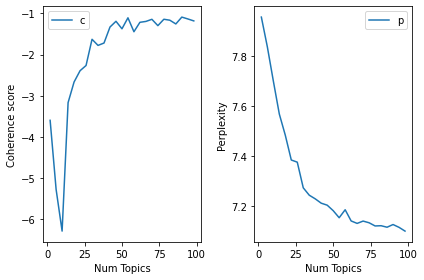

In [91]:
def compute_coherence_values(df, limit, start=2, step=3): # step : 토픽 몇 개씩 증가하면서 확인할 건지 
    """ Compute c_v coherence for various number of topics Parameters: ---------- dictionary : Gensim dictionary corpus : Gensim corpus texts : List of input texts limit : Max num of topics Returns: ------- model_list : List of LDA topic models coherence_values : Coherence values corresponding to the LDA model with respective number of topics """ 
    coherence_values = [] 
    model_list = [] 
    perplexity_values =[]
    for num_topics in range(start, limit, step): 
        lda = TopicModeling(df, num_topics)
        model = lda.LDA()
        lda.train(model)
        model_list.append(model) 
        coherencemodel = lda.get_coherence(model)[0]
        perplexitymodel = np.log(model.perplexity)
        
        coherence_values.append(coherencemodel)
        perplexity_values.append(perplexitymodel)
        
    return model_list, coherence_values, perplexity_values
        
def find_optimal_number_of_topics(df): 
    limit = 100; 
    start = 2; 
    step = 4; 
    model_list, coherence_values, perplexity_values = compute_coherence_values(df= df, start=start, limit=limit, step=step)
    x = range(start, limit, step) 
    plt.subplot(1, 2, 1)
    plt.plot(x, coherence_values) 
    plt.xlabel("Num Topics") 
    plt.ylabel("Coherence score") 
    plt.legend(("coherence"), loc='best') 
    
    plt.subplot(1, 2, 2)
    plt.plot(x, perplexity_values) 
    plt.xlabel("Num Topics") 
    plt.ylabel("Perplexity") 
    plt.legend(("perplexity"), loc='best') 
    
    plt.tight_layout()
    plt.show() 
    
    
if __name__ == '__main__': 
    
    print('Number of unique tokens: %d' % len(model.used_vocabs)) 
    print('Number of documents: %d' % len(df.index))

    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO) # 최적의 토픽 수 찾기 
    find_optimal_number_of_topics(df)

In [92]:
lda = TopicModeling(df,54)
model = lda.LDA()
lda.train(model)
lda.get_coherence(model)
len(model.used_vocabs)

Training...


Num docs: 268 , Vocab size: 3648 , Num words: 461960
Removed top words: []
Iteration: 0	Log-likelihood: -7.436641087052411
Iteration: 100	Log-likelihood: -7.270159884800576
Iteration: 200	Log-likelihood: -7.200779340208946
Iteration: 300	Log-likelihood: -7.164056590485985
Iteration: 400	Log-likelihood: -7.152101010222835
topic 개수 :  54 | 사용된 vocab 수 :  3648 | Coherence 점수 :  -1.1095932702668687 | Perplexity 점수 :  7.152101010222835


3648

In [93]:
for i in range(model.k):
    res = model.get_topic_words(i, top_n=10) # top 10
    print('Topic #{}'.format(i), end='\t')
    print(', '.join(w for w, p in res))
    
    

Topic #0	constraint, classifications, million, middletown, classification, decisionmaking, pronouncement, action, purpose, gasb
Topic #1	canandaigua, variance, million, maintaining, variances, uncompleted, consumption, ontario, positive, providing
Topic #2	residents, conservative, efforts, levels, challenges, effort, high, developed, receipts, critical
Topic #3	school, june, district, airport, versus, obtain, joint, regional, previous, last
Topic #4	figure, page, whole, way, proprietary, begins, businesstype, using, kinds, trustee
Topic #5	jervis, port, expendable, borrowing, clerktreasurer, replacements, water, revising, excessive, temporary
Topic #6	million, june, rent, common, rolling, self, rsi, businesstype, proprietary, stabilization
Topic #7	oneida, trail, trails, rail, miles, protect, ort, greenways, madison, elm
Topic #8	arts, recently, capitalize, performing, expanded, visitors, staff, toward, spaces, investments
Topic #9	useful, governmentwide, governmental, nearterm, found,

### 문서별 토픽 분포

In [97]:
res=model.get_topic_words(df['top_topic'][0], top_n=10)
print(', '.join(w for w, p in res))

('golf', 0.04304492101073265)

In [98]:
df['top_topic'] = 0
df['topic_dist'] = 0
df['topic_words']= 0

for i in range(len(model.docs)) :
  
  df['topic_dist'][i] = model.docs[i].get_topics(top_n=54)
  df['top_topic'][i] = model.docs[i].get_topics()[0][0]
  res=model.get_topic_words(df['top_topic'][i], top_n=10)
  df['topic_words'][i] =', '.join(w for w, p in res)

/var/folders/q9/1ydypryj47n2g37569rqj0p80000gn/T/ipykernel_6952/1494279226.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['topic_dist'][i] = model.docs[i].get_topics(top_n=54)
/var/folders/q9/1ydypryj47n2g37569rqj0p80000gn/T/ipykernel_6952/1494279226.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['top_topic'][i] = model.docs[i].get_topics()[0][0]
/var/folders/q9/1ydypryj47n2g37569rqj0p80000gn/T/ipykernel_6952/1494279226.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [103]:
! pip install openpyxl

     |████████████████████████████████| 242 kB 7.9 MB/s eta 0:00:01


In [104]:
df.to_excel('./topic_distribution.xlsx')

In [101]:
distribution=df['topic_dist']

In [64]:
#시각화를 위해 topic 순서대로 배치
df['topic_dist_sorted'] =0
for i in df.index :
    df['topic_dist_sorted'][i] = sorted(df['topic dist'][i], key=lambda topic_num : topic_num[0])

/var/folders/q9/1ydypryj47n2g37569rqj0p80000gn/T/ipykernel_6952/2619231737.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['topic_dist_sorted'][i] = sorted(df['topic dist'][i], key=lambda topic_num : topic_num[0])


In [91]:
df

,document,text,token,top topic,topic dist,topic_dist_sorted
0,Rye2019_550250.txt,\nManagement's Discussion and Analysis Decembe...,"[management, discussion, analysis, december, m...",22,"[(22, 0.395541787147522), (35, 0.3375835418701...","[(0, 1.8611583072924986e-05), (1, 2.0204672182..."
1,Rye2020_550250.txt,"\n\nAs management of the City of Rye, New York...","[management, city, rye, new, york, city, offer...",22,"[(22, 0.33466866612434387), (35, 0.31904226541...","[(0, 0.011256180703639984), (1, 0.019168224185..."
2,Rye2018_550250.txt,"\n\nAs management of the City of Rye, New York...","[management, city, rye, new, york, city, offer...",22,"[(22, 0.3647956848144531), (35, 0.363720118999...","[(0, 1.427900861017406e-05), (1, 1.54735062096..."
3,Rye2013_550250.txt,"Management's Discussion and Analysis (""MD&A"")\...","[management, discussion, analysis, md, managem...",35,"[(35, 0.3651238977909088), (22, 0.365012615919...","[(0, 1.713945675874129e-05), (1, 1.86445959116..."
4,Rye2015_550250.txt,"\n\n\nAs management of the City of Rye, New Yo...","[management, city, rye, new, york, city, offer...",22,"[(22, 0.390163391828537), (35, 0.3504879474639...","[(0, 0.008011352270841599), (1, 1.747228634485..."
...,...,...,...,...,...,...
263,SaratogaSprings2018_410252.txt,\n\nAs management of the City of Saratoga Spri...,"[management, city, springs, new, york, city, o...",53,"[(53, 0.711435854434967), (9, 0.26435947418212...","[(0, 2.8493410354712978e-05), (1, 0.0173525977..."
264,SaratogaSprings2017_410252.txt,\nManagement's Discussion and Analysis Decembe...,"[management, discussion, analysis, december, m...",53,"[(53, 0.7242289185523987), (9, 0.2472366392612...","[(0, 2.6042953322757967e-05), (1, 2.8237089281..."
265,SaratogaSprings2019_410252.txt,\n\nAs management of the City of Saratoga Spri...,"[management, city, springs, new, york, city, o...",53,"[(53, 0.6598389148712158), (9, 0.2553239762783...","[(0, 2.804454015858937e-05), (1, 3.04893292195..."
266,SaratogaSprings2015_410252.txt,\n\nAs management of the City of Saratoga Spri...,"[management, city, springs, new, york, city, o...",53,"[(53, 0.735101044178009), (9, 0.26230299472808...","[(0, 2.9028755307081155e-05), (1, 3.1513587600..."


### 시각화 전처리

In [70]:
dist_list=[]
for i in df.index :
    for j in range(54) :
        dist_list.append(df['topic_dist_sorted'][i][j][1])
        

dist_list

[1.8611583072924986e-05,
 2.0204672182444483e-05,
 4.345964771346189e-05,
 1.6602647519903257e-05,
 7.076137262629345e-05,
 1.1454204468464013e-05,
 1.4407648450287525e-05,
 7.5067860052513424e-06,
 2.291673081344925e-05,
 0.19762511551380157,
 2.1187028323765844e-05,
 1.8523664039094e-05,
 0.013422701507806778,
 1.500888083683094e-05,
 1.1022276339645032e-05,
 2.201672577939462e-05,
 1.0501123142603319e-05,
 1.1566176908672787e-05,
 0.009993977844715118,
 3.27820198435802e-05,
 5.187045189813944e-06,
 8.406796041526832e-06,
 0.395541787147522,
 1.5527097275480628e-05,
 9.808893992158119e-06,
 0.013376734219491482,
 3.7569989217445254e-05,
 0.0048758951015770435,
 2.3011263692751527e-05,
 3.827148975688033e-05,
 2.2794642063672654e-05,
 1.2883688214060385e-05,
 1.8227327018394135e-05,
 2.8225329515407793e-05,
 1.625872937438544e-05,
 0.3375835418701172,
 0.0044799065217375755,
 3.1690240575699136e-05,
 0.014344939030706882,
 9.02454848983325e-06,
 1.7210510122822598e-05,
 0.00173465919

시각화

In [75]:
dist_list

[1.8611583072924986e-05,
 2.0204672182444483e-05,
 4.345964771346189e-05,
 1.6602647519903257e-05,
 7.076137262629345e-05,
 1.1454204468464013e-05,
 1.4407648450287525e-05,
 7.5067860052513424e-06,
 2.291673081344925e-05,
 0.19762511551380157,
 2.1187028323765844e-05,
 1.8523664039094e-05,
 0.013422701507806778,
 1.500888083683094e-05,
 1.1022276339645032e-05,
 2.201672577939462e-05,
 1.0501123142603319e-05,
 1.1566176908672787e-05,
 0.009993977844715118,
 3.27820198435802e-05,
 5.187045189813944e-06,
 8.406796041526832e-06,
 0.395541787147522,
 1.5527097275480628e-05,
 9.808893992158119e-06,
 0.013376734219491482,
 3.7569989217445254e-05,
 0.0048758951015770435,
 2.3011263692751527e-05,
 3.827148975688033e-05,
 2.2794642063672654e-05,
 1.2883688214060385e-05,
 1.8227327018394135e-05,
 2.8225329515407793e-05,
 1.625872937438544e-05,
 0.3375835418701172,
 0.0044799065217375755,
 3.1690240575699136e-05,
 0.014344939030706882,
 9.02454848983325e-06,
 1.7210510122822598e-05,
 0.00173465919

In [81]:
dist

array([[1.86115831e-05, 2.02046722e-05, 4.34596477e-05, ...,
        4.54525252e-05, 1.28885122e-05, 1.03587572e-05],
       [1.12561807e-02, 1.91682242e-02, 1.26365926e-02, ...,
        1.08982604e-02, 1.19892520e-05, 9.63639559e-06],
       [1.42790086e-05, 1.54735062e-05, 3.32836607e-05, ...,
        3.48173962e-05, 9.86959458e-06, 7.92387254e-06],
       ...,
       [2.80445402e-05, 3.04893292e-05, 6.54597825e-05, ...,
        6.84627958e-05, 1.93922224e-05, 6.59838915e-01],
       [2.90287553e-05, 3.15135876e-05, 6.77821445e-05, ...,
        7.08916123e-05, 2.00866543e-05, 7.35101044e-01],
       [2.68351414e-05, 2.91347951e-05, 6.26641267e-05, ...,
        6.55384356e-05, 1.85613644e-05, 7.34189570e-01]])

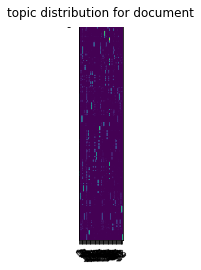

<Figure size 518400x518400 with 0 Axes>

In [90]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

docs = [df.index]
topics = range(0,54)

dist = np.array(dist_list).reshape((268, 54))



fig, ax = plt.subplots()
im = ax.imshow(dist)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(topics)))
ax.set_yticks(np.arange(len(docs)))

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(docs)):
    for j in range(len(topics)):
        text = ax.text(j, i, dist[i, j],
                       ha="center", va="center", color="w")

ax.set_title("topic distribution for document")
plt.figure(figsize=(7200, 7200))
#fig.tight_layout()

plt.show()

### 사용된 단어 확인

In [12]:
df_vocab= pd.DataFrame(zip(model.vocabs, model.vocab_freq, model.vocab_df), columns= ['vocab', 'vocab_freq', 'vocab_df'])

In [13]:
df_vocab

,vocab,vocab_freq,vocab_df
0,city,18791,268
1,fund,13507,262
2,financial,9396,268
3,year,7152,265
4,statements,7042,268
...,...,...,...
8659,nyra,1,1
8660,deferral,1,1
8661,deferrals,1,1
8662,methodology,1,1


In [20]:
df_vocab.to_csv('./used_vocab.csv')

In [113]:
df_vocab.sort_values('vocab_freq')

,vocab,vocab_freq,vocab_df
8663,calculating,1,1
6915,recruited,1,1
6914,leads,1,1
6913,considerably,1,1
6912,picked,1,1
...,...,...,...
4,statements,7042,268
3,year,7152,265
2,financial,9396,268
1,fund,13507,262


In [60]:
from math import log
idf = lambda x : log(268/(x+1)+1)
#df_vocab['vocab_idf'] = log(268/(df_vocab.vocab_df+1))
df_vocab['vocab_idf'] = df_vocab['vocab_df'].apply(idf)
df_vocab['vocab_idf']

0        0.691287
1        0.691287
2        0.693147
3        0.702608
4        0.691287
           ...   
10816    0.691287
10817    0.691287
10818    0.691287
10819    0.691287
10820    0.691287
Name: vocab_idf, Length: 10821, dtype: float64

In [61]:
df.head()

,document,text,token
0,Rye2019_550250.txt,\nManagement's Discussion and Analysis Decembe...,"[Management, s, Discussion, and, Analysis, Dec..."
1,Rye2020_550250.txt,"\n\nAs management of the City of Rye, New York...","[As, management, of, the, City, of, Rye, New, ..."
2,Rye2018_550250.txt,"\n\nAs management of the City of Rye, New York...","[As, management, of, the, City, of, Rye, New, ..."
3,Rye2013_550250.txt,"Management's Discussion and Analysis (""MD&A"")\...","[Management, s, Discussion, and, Analysis, MD,..."
4,Rye2015_550250.txt,"\n\n\nAs management of the City of Rye, New Yo...","[As, management, of, the, City, of, Rye, New, ..."


## Wordnet => 단어 유의어 찾기

In [1]:
import pandas as pd
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import wordnet 
from nltk.corpus import wordnet2021 

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/brightcircle/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/brightcircle/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [9]:
print(wordnet.synsets('man'))

[Synset('man.n.01'), Synset('serviceman.n.01'), Synset('man.n.03'), Synset('homo.n.02'), Synset('man.n.05'), Synset('man.n.06'), Synset('valet.n.01'), Synset('man.n.08'), Synset('man.n.09'), Synset('man.n.10'), Synset('world.n.08'), Synset('man.v.01'), Synset('man.v.02')]


In [2]:
conf_list = ['optimism', 'praise', 'dear', 'delightful', 'witty', 'mighty', 'handsome', 'beautiful', 'mighty', 'handsome', 'beautiful', 'shrewd', 'bright', 'vigilant', 'reasonable', 'successful', 'conscientious', 'renowned', 'faithful', 'good', 'noble', 'cheerful', 'passionate', 'happiness', 'thanks', 'smile', 'welcome', 'excited', 'fun', 'lucky', 'celebrating', 'pride', 'auspicious', 'healing', 'encourage', 'secure', 'relieved', 'faith', 'honesty', 'self-sacrifice', 'virtue', 'courage', 'dedication', 'wisdom', 'mercy', 'patriotism', 'success', 'education']

In [3]:
blame_list = ['mean', 'naive', 'sloppy', 'stupid', 'facist', 'repugnant', 'malicious', 'bankrupt', 'rash', 'morbid', 'embarrassing', 'weary', 'nervous', 'painful', 'detrimental', 'cruel', 'illegitimate', 'offensive', 'misery', 'pollution', 'killers', 'bankruptcy', 'enemies', 'vices', 'infidelity', 'despots', 'betrayal', 'injustice', 'slavery', 'exploitation', 'rebellion', 'grief', 'unemployment', 'died', 'apprehension', 'error', 'cop-outs', 'weakness']

### 표제어 추출

In [80]:
lemma_df = pd.DataFrame(columns=['word', 'synonym', 'lemmas'] )

for word in conf_list :
    synonyms=[]
    for syn in wordnet.synsets(word):
        lemma_list=[]
        synonyms.append(syn.name())
        for l in syn.lemmas():
            lemma_list.append(l.name())
        
    lemma = {'word' : word, 'synonym' : synonyms, 'lemmas' : lemma_list}
    lemma_df = lemma_df.append(lemma, ignore_index=True)
        

/var/folders/q9/1ydypryj47n2g37569rqj0p80000gn/T/ipykernel_80999/1839096426.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lemma_df = lemma_df.append(lemma, ignore_index=True)
/var/folders/q9/1ydypryj47n2g37569rqj0p80000gn/T/ipykernel_80999/1839096426.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lemma_df = lemma_df.append(lemma, ignore_index=True)
/var/folders/q9/1ydypryj47n2g37569rqj0p80000gn/T/ipykernel_80999/1839096426.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lemma_df = lemma_df.append(lemma, ignore_index=True)
/var/folders/q9/1ydypryj47n2g37569rqj0p80000gn/T/ipykernel_80999/1839096426.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

In [81]:
lemma_df

,word,synonym,lemmas
0,optimism,"[optimism.n.01, optimism.n.02]",[optimism]
1,praise,"[praise.n.01, praise.n.02, praise.v.01]",[praise]
2,dear,"[beloved.n.01, lamb.n.04, beloved.s.01, dear.s...","[dearly, dear]"
3,delightful,[delightful.s.01],"[delightful, delicious]"
4,witty,[witty.s.01],[witty]
5,mighty,"[mighty.s.01, mighty.r.01]","[mighty, mightily, powerful, right]"
6,handsome,"[fine-looking.s.01, big.s.12]","[big, bighearted, bounteous, bountiful, freeha..."
7,beautiful,"[beautiful.a.01, beautiful.s.02]",[beautiful]
8,mighty,"[mighty.s.01, mighty.r.01]","[mighty, mightily, powerful, right]"
9,handsome,"[fine-looking.s.01, big.s.12]","[big, bighearted, bounteous, bountiful, freeha..."


In [84]:
lemma_df.to_excel('./Wordnet_유사_표제어추출.xlsx')

### 단어별(단어 의미별) similarity 계산

In [4]:
wordnet_df = pd.DataFrame(columns=['word', 'synonym', 'similarity', 'synonym-similarity'] )
n=0
for word in blame_list :
    
    synonyms = []
    similarities = []
    sym_sim=[]

    for syn in wordnet.synsets(word):
        synonym = syn.name()
        similarity = wordnet.synsets(word)[0].wup_similarity(syn)
        
        synonyms.append(synonym)
        similarities.append(similarity)
        sym_sim.append((synonym, similarity))
    
    word_net = {'word' : word, 'synonym': synonyms, 'similarity': similarities, 'synonym-similarity':sym_sim}
    wordnet_df = wordnet_df.append(word_net, ignore_index=True)
   
    n+=1

/var/folders/q9/1ydypryj47n2g37569rqj0p80000gn/T/ipykernel_86789/1738411667.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wordnet_df = wordnet_df.append(word_net, ignore_index=True)
/var/folders/q9/1ydypryj47n2g37569rqj0p80000gn/T/ipykernel_86789/1738411667.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wordnet_df = wordnet_df.append(word_net, ignore_index=True)
/var/folders/q9/1ydypryj47n2g37569rqj0p80000gn/T/ipykernel_86789/1738411667.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wordnet_df = wordnet_df.append(word_net, ignore_index=True)
/var/folders/q9/1ydypryj47n2g37569rqj0p80000gn/T/ipykernel_86789/1738411667.py:18: FutureWarning: The frame.append method is deprecated and will be removed from panda

In [5]:
wordnet_df

,word,synonym,similarity,synonym-similarity
0,mean,"[mean.n.01, mean.v.01, entail.v.01, mean.v.03,...","[1.0, 0.10526315789473684, 0.11764705882352941...","[(mean.n.01, 1.0), (mean.v.01, 0.1052631578947..."
1,naive,"[naive.a.01, primitive.s.04, naive.s.03, unins...","[1.0, 0.5, 0.5, 0.5, 0.5]","[(naive.a.01, 1.0), (primitive.s.04, 0.5), (na..."
2,sloppy,"[sloppy.s.01, sloppy.s.02, boggy.s.01, baggy.s...","[1.0, 0.5, 0.5, 0.5, 0.5, 0.5]","[(sloppy.s.01, 1.0), (sloppy.s.02, 0.5), (bogg..."
3,stupid,"[stupid.n.01, stupid.a.01, dazed.s.01, unintel...","[1.0, 0.2, 0.2, 0.2]","[(stupid.n.01, 1.0), (stupid.a.01, 0.2), (daze..."
4,facist,[],[],[]
5,repugnant,[abhorrent.s.01],[1.0],"[(abhorrent.s.01, 1.0)]"
6,malicious,[malicious.a.01],[1.0],"[(malicious.a.01, 1.0)]"
7,bankrupt,"[bankrupt.n.01, bankrupt.v.01, bankrupt.s.01]","[1.0, 0.11764705882352941, 0.18181818181818182]","[(bankrupt.n.01, 1.0), (bankrupt.v.01, 0.11764..."
8,rash,"[rash.n.01, rash.n.02, rash.s.01, foolhardy.s.01]","[1.0, 0.25, 0.16666666666666666, 0.16666666666...","[(rash.n.01, 1.0), (rash.n.02, 0.25), (rash.s...."
9,morbid,"[morbid.s.01, ghoulish.s.01, diseased.s.01]","[1.0, 0.5, 0.5]","[(morbid.s.01, 1.0), (ghoulish.s.01, 0.5), (di..."


In [6]:
wordnet_df.to_excel('./wordnet_반대어 유사단어와 유사도 추출.xlsx')